In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
import lstm, time #helper libraries
from keras.models import load_model

Using TensorFlow backend.


In [2]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('spy.csv', 5, True)

In [3]:
#Step 2 Build Model
def buildModel():
    model = Sequential()

    model.add(LSTM(
        input_dim=1,
        output_dim=5,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        50,
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=1))
    model.add(Activation('linear'))

    start = time.time()
    model.compile(loss='mse', optimizer='rmsprop')
    print 'compilation time : ', time.time() - start
    return model

In [4]:
#Step 3 Train the model
def fit_model(mod):
    mod.fit(
        X_train,
        y_train,
        batch_size=512,
        nb_epoch=1,
        validation_split=0.01)
    return mod

compilation time :  0.0164129734039
compilation time :  0.0160899162292
Train on 5451 samples, validate on 56 samples
Epoch 1/1
5451/5451 [==============================] - 0s - loss: 6.2523e-04 - val_loss: 3.8749e-04


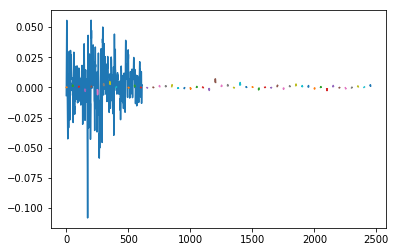

In [5]:
#Step 4 - Plot the predictions!
model = buildModel()

n_rounds = 1
preds = np.array([])
for i in range(n_rounds):
    model = buildModel()
    model = fit_model(model)
    predictions = lstm.predict_sequences_multiple(model, X_test, 5, 5)
    preds = np.append(preds, predictions)

#preds = np.reshape(preds, (n_rounds, 20, 30))

#predictions = np.mean(preds, axis = 0)
#predictions = predictions.tolist()
lstm.plot_results_multiple(predictions, y_test, 5)




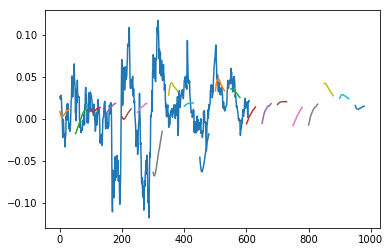

609

In [6]:


#model.save('vixModel_ayy.h5')

mod = load_model('mod2_ayy.h5')
X_train, y_train, X_test, y_test = lstm.load_data('spy.csv', 30, True)

predictions2 = lstm.predict_sequences_multiple(mod, X_test, 30,30)
lstm.plot_results_multiple(predictions2, y_test, 30)


len(X_test)


In [7]:
predictiones = lstm.predict_sequences_multiple_full(mod, X_test,30,30)

l = [item for sublist in predictiones for item in sublist]
np.savetxt("negrodamus_aa.csv", l, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")
